# T00172196

## **Allocation of marks**

Stages 1,2,3   Total 30%

Ideally your dataset will not need a lot of work. Marks going for the choosing,  training, evaluation and refining of model primarily




---



Stage 4,5       Total 60%

Choose your model

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


Train and evaluate your model. Refine the model or choose another estimator or approach?

Do not overwrite cells and add commentry between iterations.



---




Stage 6         Total 10%

# **Stage 1**
***Describe Data***

The dataset is gathered for patients based on a number of clinical factors/personal factors for the purpose of determining the likleyhood of if a patient is at high risk of having a stroke

#### Dataset Used Taken from 
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download

#### Data columns
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not

Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [156]:
# Library imports and config

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy

# File imports

data = pd.read_csv('./data/healthcare-dataset-stroke-data.csv')

peek = data.head(10)
pd.set_option('display.width', 1000)
pd.set_option('display.precision', 3)
print(peek)

      id  gender   age  hypertension  heart_disease ever_married      work_type Residence_type  avg_glucose_level   bmi   smoking_status  stroke
0   9046    Male  67.0             0              1          Yes        Private          Urban             228.69  36.6  formerly smoked       1
1  51676  Female  61.0             0              0          Yes  Self-employed          Rural             202.21   NaN     never smoked       1
2  31112    Male  80.0             0              1          Yes        Private          Rural             105.92  32.5     never smoked       1
3  60182  Female  49.0             0              0          Yes        Private          Urban             171.23  34.4           smokes       1
4   1665  Female  79.0             1              0          Yes  Self-employed          Rural             174.12  24.0     never smoked       1
5  56669    Male  81.0             0              0          Yes        Private          Urban             186.21  29.0  formerly 

In [157]:
# Check how many rows in dataset
print('Dataset columns: ' + str(data.columns.to_list()))
print('\nDataset contains: ' + str(data.shape[0]) + ' rows')
print('\nShape of data:' + str(data.shape))

print('\nTypes of each column: ' + str(data.info()))

Dataset columns: ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']

Dataset contains: 5110 rows

Shape of data:(5110, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null

In [158]:
# Statistical Summary
description = data.describe()
print(description)

              id       age  hypertension  heart_disease  avg_glucose_level       bmi    stroke
count   5110.000  5110.000      5110.000       5110.000           5110.000  4909.000  5110.000
mean   36517.829    43.227         0.097          0.054            106.148    28.893     0.049
std    21161.722    22.613         0.297          0.226             45.284     7.854     0.215
min       67.000     0.080         0.000          0.000             55.120    10.300     0.000
25%    17741.250    25.000         0.000          0.000             77.245    23.500     0.000
50%    36932.000    45.000         0.000          0.000             91.885    28.100     0.000
75%    54682.000    61.000         0.000          0.000            114.090    33.100     0.000
max    72940.000    82.000         1.000          1.000            271.740    97.600     1.000


### Checking the distribution of some elements to ensure variability in the dataset

stroke
0    4861
1     249
dtype: int64


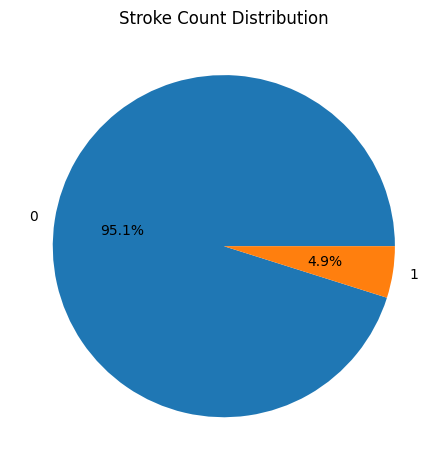

In [159]:
stroke_counts = data.groupby('stroke').size()
print(stroke_counts)

labels = stroke_counts.index.to_list()
values = stroke_counts.values.tolist()

fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%.1f%%')
ax.set_title('Stroke Count Distribution')
plt.tight_layout()

gender
Female    2994
Male      2115
Other        1
dtype: int64


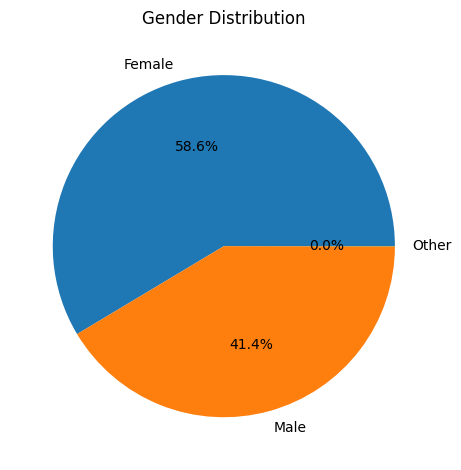

In [160]:
# Check to make sure it was removed
gender_counts = data.groupby('gender').size()
print(gender_counts)

# Plot dist
gender_counts = data.groupby('gender').size()
labels = gender_counts.index.to_list()
values = gender_counts.values.tolist()


fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%.1f%%')
ax.set_title('Gender Distribution')
plt.tight_layout()

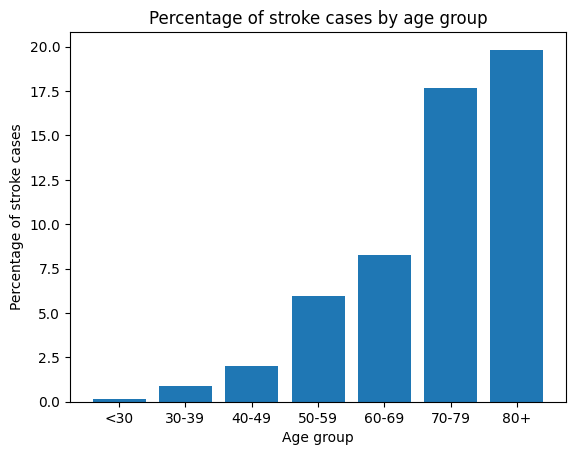

In [161]:
data_for_age_vs_stroke_graph = deepcopy(data)
# Filter to show only patients who have had a stroke

fig, ax = plt.subplots()

# The data wouldn't graph right so I came across this to maybe solve categorising each age
# https://absentdata.com/pandas/pandas-cut-continuous-to-categorical/
# https://stackoverflow.com/questions/52753613/grouping-categorizing-ages-column
age_bins = [0, 30, 40, 50, 60, 70, 80, 100]
age_labels = ['<30', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']


data_for_age_vs_stroke_graph['age_group'] = pd.cut(data_for_age_vs_stroke_graph['age'], bins=age_bins, labels=age_labels, include_lowest=True)

stroke_counts = data_for_age_vs_stroke_graph.groupby('age_group')['stroke'].sum()


# Calculate the percentage of stroke cases for each age group
proportions = stroke_counts / data_for_age_vs_stroke_graph.groupby('age_group')['stroke'].count() * 100

# Create a bar plot
plt.bar(age_labels, proportions)

# Set the title and axis labels, * If str is not callable on plt.title restart kernal (seems to be an issue with matplotlib)
plt.title(label='Percentage of stroke cases by age group')
plt.xlabel('Age group')
plt.ylabel('Percentage of stroke cases')

# Show the plot
plt.show()

We can see some clear outliers in the dataset, In a real world example I would probably go back to the author of the dataset and see if they can provide a set with more confirmed stroke cases, I also need to remove the clear outlier in 'Other' gender which has one counted element within the dataset, For the BMI I think

# **Stage 2**

Justification for the property that you would like the model to predict.

Based on the clinical elements proided can we indicate a risk factor for someone based on passing through the clinical values, The output parameter I would like to generate is either a 1 or 0 with 1 being a high risk factor to have a stroke and 0 for low risk factor of having a stroke

# **Stage 3**

Cleaning the data, linking datasets etc.. 

Based on Stage one of analyzing the data I have confirmed the following in terms of cleaning the data

- Remove the single outlier of "Other" flag in gender as there is simply not enough records to have an impact on the model
- Drop the ID column as there is no relevance in the prediction stage and it will remove any bias might gain towards the number
- Replace the NaN values for BMI with the median BMI value



1. Dropping the single "Other" record from the dataset

In [162]:
# https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/
indexGender = data[ (data['gender'] == 'Other')].index
data.drop(indexGender , inplace=True)
data.head(15)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


2.) Drop the ID Column from the dataset in case any bias arises during the training section

In [163]:
data.drop(columns=["id"], inplace=True)
data.head(15)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


3. Replace NaN Values in BMI

In [164]:
print('Null values in data:')
print(data.isnull().sum())

Null values in data:
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [165]:
data['bmi'] = data['bmi'].fillna((data['bmi'].median()))
print('Null values is data after replacement:')
print(data.isnull().sum())

Null values is data after replacement:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


# **Stage 4**
Choose and train Estimator.

Based on following the link provided for choosing the right estimator and some research, I think the model provided in the keras example page would work with this and would give me a deeper understanding of how Keras/Tensorflow work

Based on the the link for choosing the right estimator I need a classifier would work best here

https://keras.io/examples/structured_data/structured_data_classification_from_scratch/#feature-preprocessing-with-keras-layers

In [166]:
import tensorflow as tf
import numpy as np
import pandas as pd
import keras as keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
# Convert data to be compatible with tensorflow - https://www.tensorflow.org/tutorials/load_data/pandas_dataframe
# Copying the data here so any changes going forward do not overwrite the reference variable
data_for_model = deepcopy(data)
# Check dTypes
# print(str(data_for_model.dtypes))

# Just realised I need to convert object values to categories based on errors
# When I went looking for examples to convert I came across a really cool function to change the objects to boolean values
# The get_dummies function creates a new column based on each category type and sets to 1/0 depending on the columns value
# This works here for these columns as there is only a few set types for these columns but I suspect this should be used only when the groups are so small
# https://www.sharpsightlabs.com/blog/pandas-get-dummies/
data_for_model = pd.get_dummies(data_for_model, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

# Check dTypes after
# print('\n' + str(data_for_model.dtypes))

# Dropping the 
y = data_for_model["stroke"]
X = data_for_model.drop(columns="stroke")

print('\nX shape: ' + str(X.shape))
print('Y shape: ' + str(y.shape))


# Create training and testing datasets using the train_test_split method provided by sklearn 
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# I was getting an unsupported value type error, this appears to fix the issue, I think it's because the BMI is a float value
# https://stackoverflow.com/questions/58636087/tensorflow-valueerror-failed-to-convert-a-numpy-array-to-a-tensor-unsupporte
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)

y_check = np.asarray(y).astype(np.float32)

print(
    "\nUsing %d samples for training and %d for validation"
    % (len(X_train), len(X_test))
)




X shape: (5109, 20)
Y shape: (5109,)

Using 3423 samples for training and 1686 for validation


First model, To be honest just trying random values here to see how the model is performing

In [167]:
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(5, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(3, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, input_dim=X_train.shape[1], activation='softmax'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
fit_data = model.fit(x=X_train, y=y_train, epochs=12)


Epoch 1/12
107/107 [==============================] - 1s 3ms/step - loss: 0.2765 - accuracy: 0.0447
Epoch 2/12
107/107 [==============================] - 0s 2ms/step - loss: 0.2244 - accuracy: 0.0447
Epoch 3/12
107/107 [==============================] - 0s 2ms/step - loss: 0.2072 - accuracy: 0.0447
Epoch 4/12
107/107 [==============================] - 0s 2ms/step - loss: 0.1910 - accuracy: 0.0447
Epoch 5/12
107/107 [==============================] - 0s 2ms/step - loss: 0.1818 - accuracy: 0.0447
Epoch 6/12
107/107 [==============================] - 0s 2ms/step - loss: 0.1738 - accuracy: 0.0447
Epoch 7/12
107/107 [==============================] - 0s 2ms/step - loss: 0.1703 - accuracy: 0.0447
Epoch 8/12
107/107 [==============================] - 0s 2ms/step - loss: 0.1674 - accuracy: 0.0447
Epoch 9/12
107/107 [==============================] - 0s 2ms/step - loss: 0.1669 - accuracy: 0.0447
Epoch 10/12
107/107 [==============================] - 0s 2ms/step - loss: 0.1637 - accuracy: 0.0447

In [168]:
model2 = Sequential()
model2.add(Dense(40, input_dim=X_train.shape[1], activation='softmax'))
model2.add(Dense(25, input_dim=X_train.shape[1], activation='softmax'))
model2.add(Dense(25, input_dim=X_train.shape[1], activation='softmax'))
model2.add(Dense(1, input_dim=X_train.shape[1], activation='softmax'))


model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
fit_data2 = model2.fit(x=X_train, y=y_train, epochs=50)

Epoch 1/50
107/107 [==============================] - 1s 3ms/step - loss: 0.6514 - accuracy: 0.0447
Epoch 2/50
107/107 [==============================] - 0s 3ms/step - loss: 0.5489 - accuracy: 0.0447
Epoch 3/50
107/107 [==============================] - 0s 2ms/step - loss: 0.4678 - accuracy: 0.0447
Epoch 4/50
107/107 [==============================] - 0s 2ms/step - loss: 0.4036 - accuracy: 0.0447
Epoch 5/50
107/107 [==============================] - 0s 2ms/step - loss: 0.3531 - accuracy: 0.0447
Epoch 6/50
107/107 [==============================] - 0s 4ms/step - loss: 0.3137 - accuracy: 0.0447
Epoch 7/50
107/107 [==============================] - 0s 3ms/step - loss: 0.2832 - accuracy: 0.0447
Epoch 8/50
107/107 [==============================] - 0s 3ms/step - loss: 0.2593 - accuracy: 0.0447
Epoch 9/50
107/107 [==============================] - 0s 3ms/step - loss: 0.2405 - accuracy: 0.0447
Epoch 10/50
107/107 [==============================] - 0s 4ms/step - loss: 0.2258 - accuracy: 0.0447

In [171]:
# I wasn't sure how to solve the error with accuracy, Turns out the solution was to lower the units of the dense layers, I also found that having no activate function on the final layer
# Increased the accuracy and using both softmax and relu activation functions lowered the loss substantially, Only using the softmax function left the loss value very high
# https://datascience.stackexchange.com/questions/57171/how-to-improve-low-accuracy-keras-model-design

model3 = Sequential()
model3.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model3.add(Dense(15, input_dim=X_train.shape[1], activation='relu'))
model3.add(Dense(24, input_dim=X_train.shape[1], activation='relu'))
model3.add(Dense(12, input_dim=X_train.shape[1], activation='sigmoid'))
model3.add(Dense(5, input_dim=X_train.shape[1], activation='sigmoid'))
model3.add(Dense(1, input_dim=X_train.shape[1], activation='sigmoid'))


model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'], steps_per_execution=1)
fit_data3 = model3.fit(x=X_train, y=y_train, epochs=200, steps_per_epoch=75)



Epoch 1/200
75/75 [==============================] - 1s 4ms/step - loss: 0.6868 - accuracy: 0.4996
Epoch 2/200
75/75 [==============================] - 0s 3ms/step - loss: 0.4248 - accuracy: 0.9553
Epoch 3/200
75/75 [==============================] - 0s 2ms/step - loss: 0.3329 - accuracy: 0.9553
Epoch 4/200
75/75 [==============================] - 0s 2ms/step - loss: 0.2880 - accuracy: 0.9553
Epoch 5/200
75/75 [==============================] - 0s 2ms/step - loss: 0.2586 - accuracy: 0.9553
Epoch 6/200
75/75 [==============================] - 0s 2ms/step - loss: 0.2382 - accuracy: 0.9553
Epoch 7/200
75/75 [==============================] - 0s 2ms/step - loss: 0.2238 - accuracy: 0.9553
Epoch 8/200
75/75 [==============================] - 0s 2ms/step - loss: 0.2132 - accuracy: 0.9553
Epoch 9/200
75/75 [==============================] - 0s 2ms/step - loss: 0.2056 - accuracy: 0.9553
Epoch 10/200
75/75 [==============================] - 0s 2ms/step - loss: 0.1999 - accuracy: 0.9553
Epoch 11/

# **Stage 5**
Results from model 1

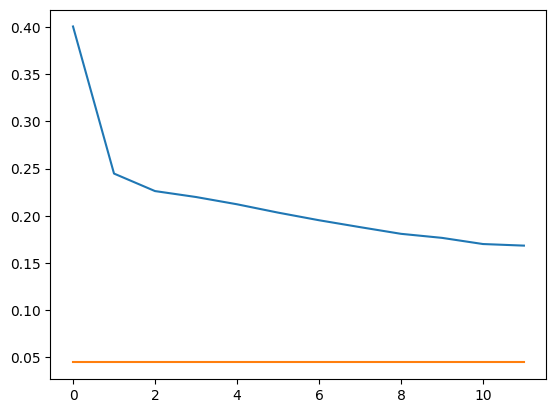

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fit_data.history['loss'])
plt.plot(fit_data.history['accuracy'])

Results from model 2

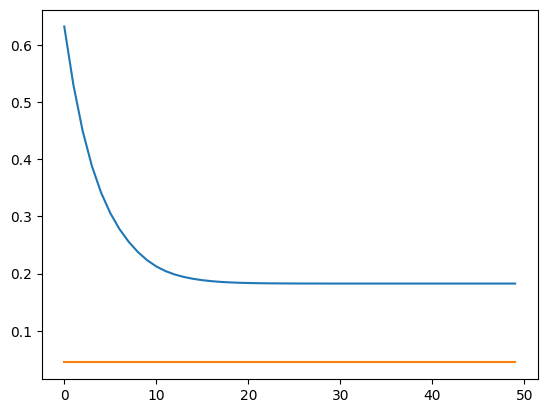

In [ ]:
plt.plot(fit_data2.history['loss'])
plt.plot(fit_data2.history['accuracy'])

Model 3

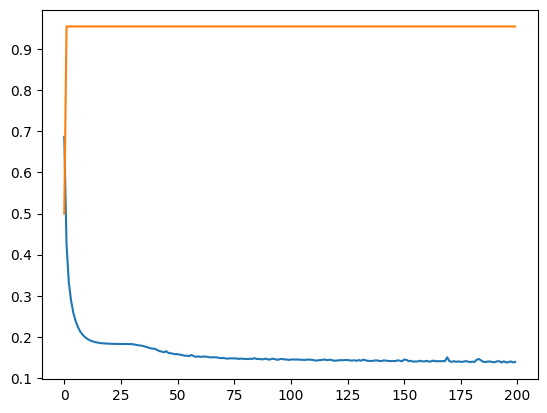

In [172]:
plt.plot(fit_data3.history['loss'])
plt.plot(fit_data3.history['accuracy'])

In [174]:
model3_score = model3.evaluate(X_test, y_test, verbose=0)

print('Test loss:', model3_score[0])
print('Test accuracy:', model3_score[1])

y_pred = model3.predict(X_test)


print(y_pred)

Test loss: 0.1825803816318512
Test accuracy: 0.9430605173110962
53/53 [==============================] - 0s 953us/step
[[0.00915541]
 [0.02104459]
 [0.01935238]
 ...
 [0.00273436]
 [0.00261328]
 [0.00269641]]


# **Stage 6**
***Present results and Conclusions***

